# **Import**

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# **Import dataset**

In [362]:
df = pd.read_csv("salaries.csv")

In [363]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


0 : no remote work, 
50 : Hybrid, 
100 : Full remote

# **Dataset analysis**

In [364]:
# Dimensions
df.shape

(151445, 11)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [366]:
# Name and types of columns
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [367]:
# Missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [368]:
# Statistics
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [369]:
#Column names
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [370]:
df.nunique()

work_year                 6
experience_level          4
employment_type           4
job_title               422
salary                12308
salary_currency          26
salary_in_usd         13580
employee_residence      104
remote_ratio              3
company_location         97
company_size              3
dtype: int64

In [371]:
df.replace({

    'remote_ratio': {
        0: 'On-site',
        50: 'Hybrid',
        100: 'Remote'
    },

    'employee_residence': {
        'US': 'United States',
        'CA': 'Canada',
        'GB': 'United Kingdom',
        'AU': 'Australia',
        'NL': 'Netherlands',
        'DE': 'Germany',
        'LT': 'Lithuania',
        'FR': 'France',
        'IN': 'India',
        'ES': 'Spain',
        'AT': 'Austria',
        'PL': 'Poland',
        'SK': 'Slovakia',
        'IE': 'Ireland',
        'MX': 'Mexico',
        'BR': 'Brazil',
        'LV': 'Latvia',
        'PT': 'Portugal',
        'AR': 'Argentina',
        'IT': 'Italy'
    },

    'company_location': {
        'US': 'United States',
        'CA': 'Canada',
        'GB': 'United Kingdom',
        'AU': 'Australia',
        'NL': 'Netherlands',
        'DE': 'Germany',
        'LT': 'Lithuania',
        'FR': 'France',
        'ES': 'Spain',
        'IN': 'India',
        'AT': 'Austria',
        'PL': 'Poland',
        'SK': 'Slovakia',
        'IE': 'Ireland',
        'MX': 'Mexico',
        'BR': 'Brazil',
        'LV': 'Latvia',
        'PT': 'Portugal',
        'AR': 'Argentina',
        'ZA': 'South Africa'
    },

}, inplace=True)

In [372]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,United States,On-site,United States,M
1,2025,EX,FT,Head of Data,232344,USD,232344,United States,On-site,United States,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,United States,On-site,United States,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,United States,On-site,United States,M
4,2025,MI,FT,Engineer,160000,USD,160000,United States,Remote,United States,M


# **Visualization**

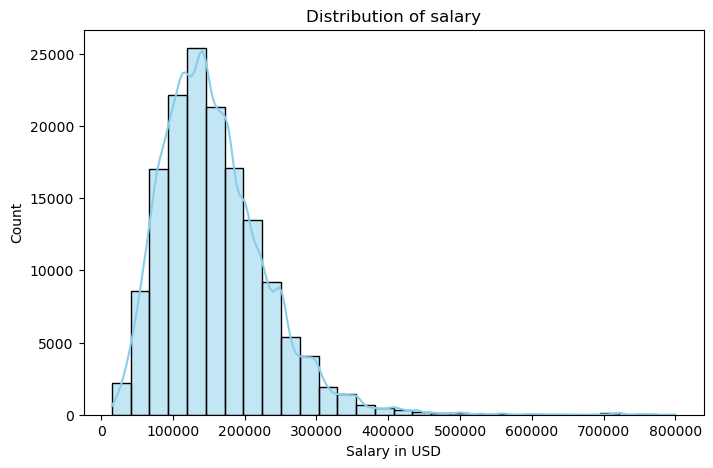

In [373]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of salary")
plt.xlabel("Salary in USD")
plt.show()

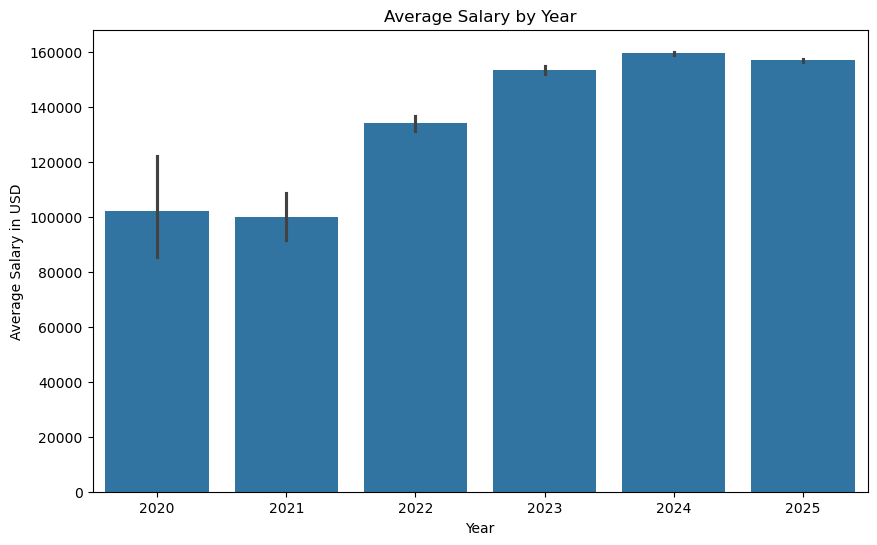

In [374]:
plt.figure(figsize=(10, 6))
sns.barplot(x='work_year', y='salary_in_usd', data=df)
plt.title("Average Salary by Year")
plt.xlabel("Year")
plt.ylabel("Average Salary in USD")
plt.show()

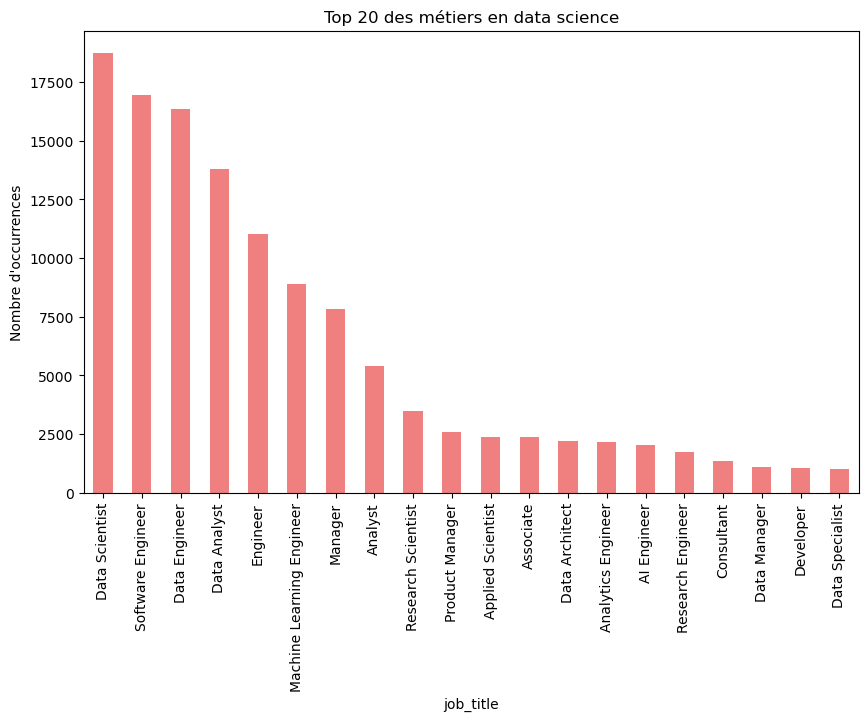

In [375]:
plt.figure(figsize=(10, 6))
df['job_title'].value_counts().head(20).plot(kind='bar', color='lightcoral')
plt.title("Top 20 des métiers en data science")
plt.ylabel("Nombre d'occurrences")
plt.show()

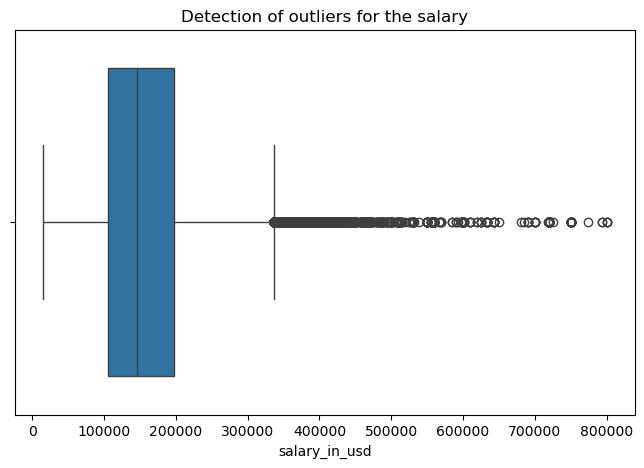

In [376]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Detection of outliers for the salary")
plt.show()

In [377]:
import plotly.express as px
import plotly.graph_objects as go
# Yearly salary trends
yearly_stats = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'std']).reset_index()

fig = px.line(yearly_stats, x='work_year', y=['mean', 'median'], 
              title='Data Science Salary Trends (2020-2025)',
              labels={'value': 'Salary (USD)', 'work_year': 'Year', 'variable': 'Metric'},
              template='plotly_white')

fig.update_layout(legend_title_text='', hovermode='x unified',
                 width=900, height=500)

# Add range for standard deviation
fig.add_trace(go.Scatter(
    x=np.concatenate([yearly_stats['work_year'], yearly_stats['work_year'][::-1]]),
    y=np.concatenate([yearly_stats['mean'] + yearly_stats['std'], 
                     (yearly_stats['mean'] - yearly_stats['std'])[::-1]]),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Standard Deviation'
))

fig.show()

# Rajouter des boxplot + des graphes

# **Duplicates**

In [378]:
df.duplicated().any()

np.True_

In [379]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(79532)

In [380]:
df = df.drop_duplicates()

In [381]:
df.shape

(71913, 11)

# **Outliers**

In [382]:
from scipy import stats

z_scores = stats.zscore(df['salary_in_usd'])

df = df[abs(z_scores) < 3]  

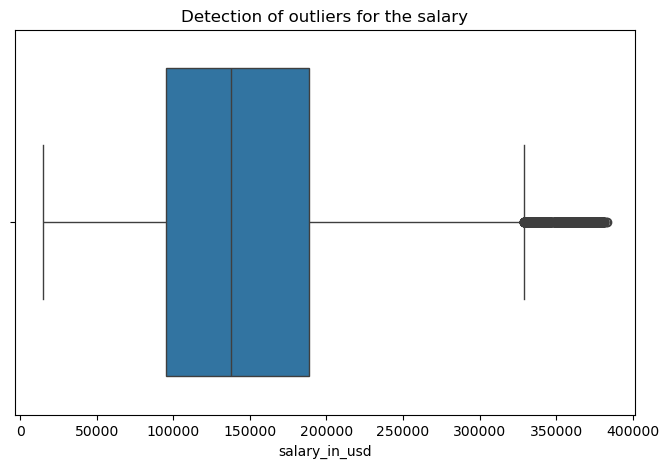

In [383]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Detection of outliers for the salary")
plt.show()

In [384]:
df.shape

(71106, 11)

# **Encoding**

In [385]:
df['experience_level'] = df['experience_level'].map({
    'EN': 1,  # Entry-level / Junior
    'MI': 2,  # Mid-level / Intermediate
    'SE': 3,  # Senior-level
    'EX': 4   # Executive / Director
})

In [386]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,4,FT,Head of Data,348516,USD,348516,United States,On-site,United States,M
1,2025,4,FT,Head of Data,232344,USD,232344,United States,On-site,United States,M
2,2025,3,FT,Data Scientist,145400,USD,145400,United States,On-site,United States,M
3,2025,3,FT,Data Scientist,81600,USD,81600,United States,On-site,United States,M
4,2025,2,FT,Engineer,160000,USD,160000,United States,Remote,United States,M


In [387]:
df['company_size'] = df['company_size'].map({
    'S': 1,  # Small (1–50 employees)
    'M': 2,  # Medium (51–500 employees)
    'L': 3   # Large (501+ employees)
})

In [388]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,4,FT,Head of Data,348516,USD,348516,United States,On-site,United States,2
1,2025,4,FT,Head of Data,232344,USD,232344,United States,On-site,United States,2
2,2025,3,FT,Data Scientist,145400,USD,145400,United States,On-site,United States,2
3,2025,3,FT,Data Scientist,81600,USD,81600,United States,On-site,United States,2
4,2025,2,FT,Engineer,160000,USD,160000,United States,Remote,United States,2


In [389]:
df['employment_type'] = df['employment_type'].map({
    'FT': 1,  # Full-time 
    'PT': 2,  # Partial-time
    'CT': 3,   # Contract
    'FL' : 4  # Freelance
})

In [390]:
job_counts = df['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

rare_jobs = job_counts[job_counts['count'] < 10]
print(rare_jobs)

                        job_title  count
228             Frontend Engineer      9
229                    Copywriter      9
230   Data Visualization Designer      9
231               AI Product Lead      9
232                  Data Analist      9
..                            ...    ...
416            Cientista de Dados      1
417      Marketing Data Scientist      1
418      Data & Analytics Analyst      1
419                 Data Operator      1
420  IT Enterprise Data Architect      1

[193 rows x 2 columns]


In [391]:
top_jobs = (df['job_title'].value_counts().head(15).index.tolist())
top_jobs

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Software Engineer',
 'Engineer',
 'Manager',
 'Machine Learning Engineer',
 'Analyst',
 'Research Scientist',
 'Analytics Engineer',
 'Product Manager',
 'Associate',
 'Data Architect',
 'AI Engineer',
 'Research Engineer']

In [392]:
import pandas as pd
from rapidfuzz import fuzz, process  

top_jobs = (df['job_title'].value_counts().head(30).index.tolist())

def normalize_job(title):
    match, score, _ = process.extractOne(title, top_jobs, scorer=fuzz.token_sort_ratio)
    if score >= 50:  
        return match
    else:
        return title  


df['job_title_clean'] = df['job_title'].apply(normalize_job)

job_counts = df['job_title_clean'].value_counts().reset_index()
job_counts.columns = ['job_title_clean', 'count']

rare_jobs = job_counts[job_counts['count'] < 10]

print(rare_jobs)

df['job_title_clean'].nunique()

                              job_title_clean  count
55                                 Copywriter      9
56                         Commercial Counsel      8
57                       Quant Options Trader      8
58                              Bear Robotics      8
59               Technical Support Specialist      7
60                       Post Doctoral Fellow      7
61                          QA Tutor Reviewer      7
62                               AI Tech Lead      5
63                         AI Governance Lead      4
64               Postdoctoral Research Fellow      4
65                  Marketing Science Partner      4
66                              Clinical Aide      4
67                 Conversational AI Designer      4
68                              AI Strategist      4
69                            Psychometrician      4
70                     Clinical Data Operator      3
71                        Quantitative Trader      3
72                          Head of Marketing 

83

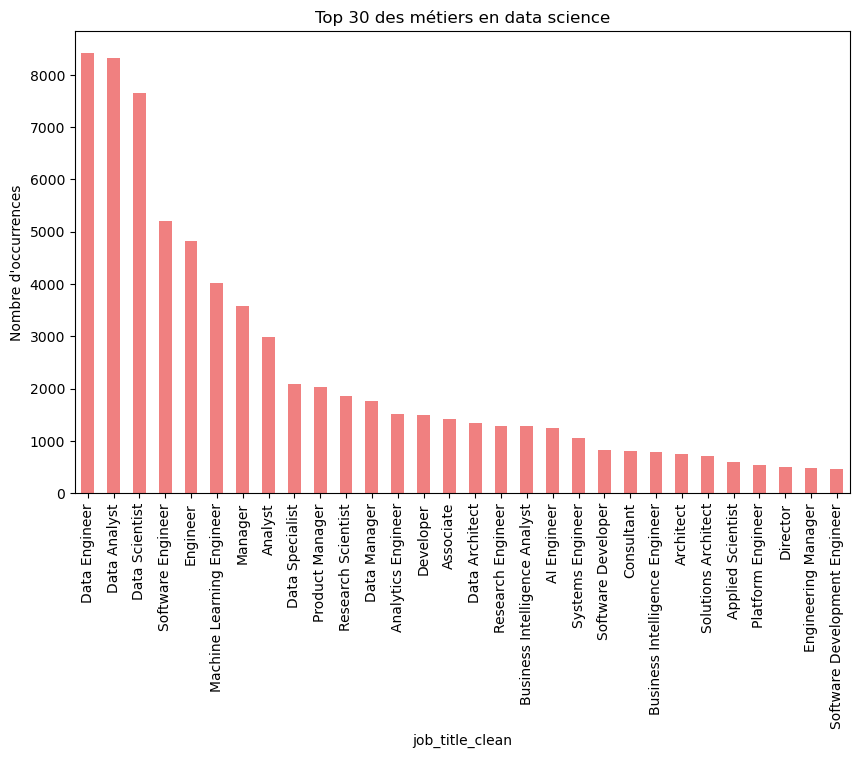

In [393]:
plt.figure(figsize=(10, 6))
df['job_title_clean'].value_counts().head(30).plot(kind='bar', color='lightcoral')
plt.title("Top 30 des métiers en data science")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [394]:
job_counts = df['job_title'].value_counts()

df = df[df['job_title'].isin(job_counts[job_counts >= 10].index)]

In [395]:
df['job_title_clean'].nunique()

55

In [396]:
df = df.drop(columns=['job_title'])

In [397]:
df.shape

(70454, 11)

In [398]:
from sklearn.preprocessing import LabelEncoder

label_cols = [
    'remote_ratio',
    'job_title_clean',
    'employee_residence',
    'company_location',
    'salary_currency'
]
    
for col in label_cols:
    le_encoder = LabelEncoder()
    df[col+'_encoded'] = LabelEncoder().fit_transform(df[col])
    df.drop([col], axis=1, inplace=True)
 

In [399]:
df.head(10)

,work_year,experience_level,employment_type,salary,salary_in_usd,company_size,remote_ratio_encoded,job_title_clean_encoded,employee_residence_encoded,company_location_encoded,salary_currency_encoded
0,2025,4,1,348516,348516,2,1,20,91,88,22
1,2025,4,1,232344,232344,2,1,20,91,88,22
2,2025,3,1,145400,145400,2,1,19,91,88,22
3,2025,3,1,81600,81600,2,1,19,91,88,22
4,2025,2,1,160000,160000,2,2,26,91,88,22
5,2025,2,1,140000,140000,2,2,26,91,88,22
8,2025,3,1,97900,97900,2,2,0,91,88,22
9,2025,3,1,89900,89900,2,2,0,91,88,22
10,2025,3,1,180500,180500,2,1,11,91,88,22
11,2025,3,1,113000,113000,2,1,11,91,88,22


In [400]:
df.describe()

,work_year,experience_level,employment_type,salary,salary_in_usd,company_size,remote_ratio_encoded,job_title_clean_encoded,employee_residence_encoded,company_location_encoded,salary_currency_encoded
count,70454.000000,70454.00000,70454.000000,7.045400e+04,70454.000000,70454.000000,70454.000000,70454.000000,70454.000000,70454.000000,70454.000000
mean,2024.425668,2.49005,1.015996,1.579352e+05,147690.461535,2.018267,1.240795,23.185241,83.448633,80.838618,20.790431
std,0.716021,0.74192,0.165468,2.842325e+05,68636.615024,0.152175,0.436017,12.645937,21.316170,20.314597,4.109070
min,2020.000000,1.00000,1.000000,1.400000e+04,15000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.000000,2.00000,1.000000,9.604250e+04,96000.000000,2.000000,1.000000,15.000000,91.000000,88.000000,22.000000
50%,2025.000000,3.00000,1.000000,1.387240e+05,138000.000000,2.000000,1.000000,19.000000,91.000000,88.000000,22.000000
75%,2025.000000,3.00000,1.000000,1.900000e+05,189000.000000,2.000000,1.000000,32.000000,91.000000,88.000000,22.000000
max,2025.000000,4.00000,4.000000,3.040000e+07,383000.000000,3.000000,2.000000,54.000000,95.000000,91.000000,23.000000


In [401]:
df.dtypes

work_year                     int64
experience_level              int64
employment_type               int64
salary                        int64
salary_in_usd                 int64
company_size                  int64
remote_ratio_encoded          int64
job_title_clean_encoded       int64
employee_residence_encoded    int64
company_location_encoded      int64
salary_currency_encoded       int64
dtype: object

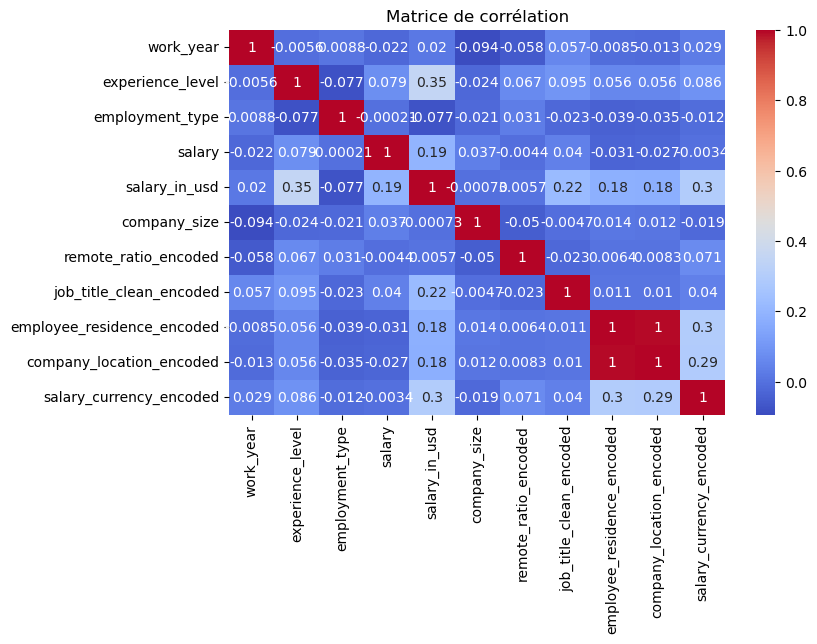

In [402]:
#heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

## **Formalisation of the problem**

The objective of this project is to develop a machine learning model capable of predicting employees salaries based on their professional and job-related characteristics. By analyzing features such as experience level, employment type, remote work ratio, company size, and job title, the model aims to capture the key factors that influence salary levels. The ultimate goal is to provide an accurate, data-driven tool that supports fair salary estimation and informed decision-making within the job market.

## **Model**

In [403]:
X = df.drop('salary_in_usd', axis=1)
y = np.log(df['salary_in_usd'])

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [405]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [406]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = {
    'Linear': LinearRegression(),
    'ElasticNet': ElasticNet(
        alpha=0.01, l1_ratio=0.2, max_iter=10000, random_state=42
    ),

    # Polynomial Regression (sans scaler interne)
    'Poly2_Linear': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linreg', LinearRegression())
    ]),
    'Poly2_ElasticNet': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('enet', ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=10000, random_state=42))
    ]),

    # Decision Tree
    'DecisionTree': DecisionTreeRegressor(
        max_depth=None,
        min_samples_leaf=2,
        random_state=42
    ),

    'RandomForest': RandomForestRegressor(
        n_estimators=600, max_depth=None, min_samples_leaf=2,
        n_jobs=-1, random_state=42
    ),
    'HistGBR': HistGradientBoostingRegressor(
        learning_rate=0.06, max_leaf_nodes=31, min_samples_leaf=20,
        l2_regularization=1.0, random_state=42
    ),
    'SVR_RBF': SVR(C=10.0, epsilon=0.1, kernel='rbf', gamma='scale'),

}

In [407]:
X_train.head()

,work_year,experience_level,employment_type,salary,company_size,remote_ratio_encoded,job_title_clean_encoded,employee_residence_encoded,company_location_encoded,salary_currency_encoded
88141,2024,2,1,175000,2,1,0,91,88,22
85710,2024,2,1,61000,2,1,17,91,88,22
35762,2025,2,1,104200,2,1,19,91,88,22
106285,2024,2,1,156000,2,1,45,91,88,22
148619,2023,3,1,85500,2,1,15,91,88,22


In [408]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = np.exp(model.predict(X_test))
    y_true = np.exp(y_test)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name:10s}  RMSE={rmse:,.0f}  MAE={mae:,.0f}  R²={r2:.3f}")

Linear      RMSE=61,089  MAE=45,375  R²=0.199
ElasticNet  RMSE=61,167  MAE=45,390  R²=0.197
Poly2_Linear  RMSE=29,345,083  MAE=274,484  R²=-184763.867


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.485e+03, tolerance: 1.446e+00



Poly2_ElasticNet  RMSE=43,049,309  MAE=390,199  R²=-397630.770
DecisionTree  RMSE=2,524  MAE=163  R²=0.999
RandomForest  RMSE=2,296  MAE=183  R²=0.999
HistGBR     RMSE=3,264  MAE=737  R²=0.998
SVR_RBF     RMSE=13,603  MAE=9,732  R²=0.960


In [409]:
models = {
'XGBoost': XGBRegressor(
        n_estimators=1500, learning_rate=0.05, max_depth=8,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        tree_method='hist', random_state=42, n_jobs=-1
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=1500, learning_rate=0.05, num_leaves=63,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, n_jobs=-1
    ),
    'CatBoost': CatBoostRegressor(
        depth=8, learning_rate=0.05, l2_leaf_reg=3.0, n_estimators=3000,
        loss_function='RMSE', eval_metric='RMSE', random_seed=42,
        od_type='Iter', od_wait=100, verbose=False
    )
}

In [411]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = np.exp(model.predict(X_test))
    y_true = np.exp(y_test)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name:10s}  RMSE={rmse:,.0f}  MAE={mae:,.0f}  R²={r2:.3f}")

XGBoost     RMSE=2,437  MAE=626  R²=0.999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 56363, number of used features: 10
[LightGBM] [Info] Start training from score 11.786008
LightGBM    RMSE=3,460  MAE=635  R²=0.997
CatBoost    RMSE=2,135  MAE=502  R²=0.999


In [413]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, root_mean_squared_error

cv = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

# 1) DecisionTree
dt = DecisionTreeRegressor(random_state=42)
param_dt = {
    'max_depth': [None, 8, 12, 16, 24],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
}
gs_dt = GridSearchCV(dt, param_dt, scoring=rmse_scorer, cv=cv, n_jobs=-1, verbose=1)
gs_dt.fit(X_train, y_train)
print("DecisionTree best:", -gs_dt.best_score_, gs_dt.best_params_)

# 2) RandomForest
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
param_rf = {
    'n_estimators': [400, 800, 1200],
    'max_depth': [None, 12, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 0.6, 1.0],
    'bootstrap': [True],
}
gs_rf = GridSearchCV(rf, param_rf, scoring=rmse_scorer, cv=cv, n_jobs=-1, verbose=1)
gs_rf.fit(X_train, y_train)
print("RandomForest best:", -gs_rf.best_score_, gs_rf.best_params_)

# 3) XGBoost
xgb = XGBRegressor(
    tree_method='hist',
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse' 
)
param_xgb = {
    'n_estimators': [600, 1000, 1500],
    'learning_rate': [0.03, 0.05, 0.08],
    'max_depth': [6, 8, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0],
    'reg_lambda': [0.5, 1.0, 2.0],
}
gs_xgb = GridSearchCV(xgb, param_xgb, scoring=rmse_scorer, cv=cv, n_jobs=-1, verbose=1)
gs_xgb.fit(X_train, y_train)
print("XGBoost best:", -gs_xgb.best_score_, gs_xgb.best_params_)

# 4) CatBoost
cb = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)
param_cb = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05, 0.08],
    'l2_leaf_reg': [1.0, 3.0, 5.0],
    'n_estimators': [1000, 2000, 3000],
    'bagging_temperature': [0.0, 0.5, 1.0],
}
gs_cb = GridSearchCV(cb, param_cb, scoring=rmse_scorer, cv=cv, n_jobs=-1, verbose=1)
gs_cb.fit(X_train, y_train)
print("CatBoost best:", -gs_cb.best_score_, gs_cb.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
DecisionTree best: 0.043831466534947607 {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x107135bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
/opt/anaconda3/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

Exception ignored in: <function ResourceTracker.__del__ at 0x10492dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaco

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

def eval_on_test(name, model):
    y_pred = np.exp(y_pred)     
    y_true = np.exp(y_test)     
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name:12s}  RMSE={rmse:,.0f}  MAE={mae:,.0f}  R²={r2:.3f}")

eval_on_test('DecisionTree', gs_dt.best_estimator_)
eval_on_test('RandomForest', gs_rf.best_estimator_)
eval_on_test('XGBoost', gs_xgb.best_estimator_)
eval_on_test('CatBoost', gs_cb.best_estimator_)

In [ ]:
# Les GridSearchCV retournent des scores négatifs (car greater_is_better=False)
results = [
    ("DecisionTree", gs_dt),
    ("RandomForest", gs_rf),
    ("XGBoost", gs_xgb),
    ("CatBoost", gs_cb),
]

best_name, best_gs = min(results, key=lambda x: x[1].best_score_)  # plus proche de 0 = meilleur RMSE
best_est = best_gs.best_estimator_

print("Meilleur modèle (CV):", best_name, "RMSE CV =", -best_gs.best_score_)
eval_on_test(best_name, best_est, X_test, y_test, log_target=False)  # mets True si tu as log-transformé

In [ ]:
from sklearn.ensemble import VotingRegressor

voters = []
if gs_dt is not None: voters.append(("dt", gs_dt.best_estimator_))
if gs_rf is not None: voters.append(("rf", gs_rf.best_estimator_))
if gs_xgb is not None: voters.append(("xgb", gs_xgb.best_estimator_))
if gs_cb is not None: voters.append(("cb", gs_cb.best_estimator_))

voting = VotingRegressor(estimators=voters, weights=None)  # tu peux ajuster weights
voting.fit(X_train, y_train)
eval_on_test("Voting", voting, X_test, y_test, log_target=False)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.base import clone

base = clone(best_est)  # important: cloner pour un entraînement frais
bag = BaggingRegressor(
    estimator=base,
    n_estimators=20,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)
bag.fit(X_train, y_train)
eval_on_test(f"Bagging({best_name})", bag, X_test, y_test, log_target=False)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# Bases: choisis 2-4 modèles complémentaires
base_estimators = []
if best_name != "RandomForest": base_estimators.append(("rf", gs_rf.best_estimator_))
if best_name != "XGBoost": base_estimators.append(("xgb", gs_xgb.best_estimator_))
if best_name != "CatBoost": base_estimators.append(("cb", gs_cb.best_estimator_))
if best_name != "DecisionTree": base_estimators.append(("dt", gs_dt.best_estimator_))

meta = clone(best_est)  # meilleur modèle devient méta-modèle
stack_meta_best = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta,
    passthrough=False,   # mets True pour donner X original au méta-modèle en plus des preds
    n_jobs=-1,
    cv=5
)
stack_meta_best.fit(X_train, y_train)
eval_on_test("Stacking(meta=best)", stack_meta_best, X_test, y_test, log_target=False)